In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [70]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
countries = CountryMetaDataFile().readMetadata()
dl = DataLib("SignalData")

In [55]:
LongRates = dl.pull("LongRates")
country_codes = LongRates.columns
bizdays = LongRates.index

**1) Look at bond yields across countries. Which countries have produced the highest and lowest returns?**

In [6]:
LongRates = dl.pull("LongRates")

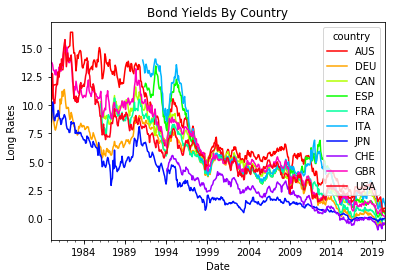

In [7]:
LongRates.plot(cmap='hsv')
plt.xlabel('Date')
plt.ylabel('Long Rates')
plt.title('Bond Yields By Country')
plt.show()

From the graph above, it appears that since 1980, Australia has produced the highest bond returns on average, while Japan has produced the lowest bond returns.

**2) Look at rolling 3-year returns. Pick a case where a country strongly outperforms the rest of the world and a case where one underperforms. What was going on in each market at these times? A few sentences and a chart - not a deep dive country report.**

In [8]:
BondReturnIndex = dl.pull("BondRetIdx/LocalFX")
Daily_Returns = BondReturnIndex.pct_change()


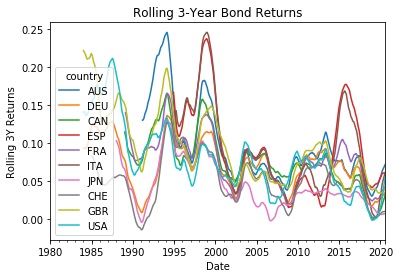

In [9]:
BondReturnIndex = dl.pull("BondRetIdx/LocalFX")
Bond_Returns = BondReturnIndex.pct_change(261)
Rolling3YReturns = Bond_Returns.rolling(783).mean()

Rolling3YReturns.plot()
plt.title("Rolling 3-Year Bond Returns")
plt.xlabel('Date')
plt.ylabel('Rolling 3Y Returns')
plt.show()

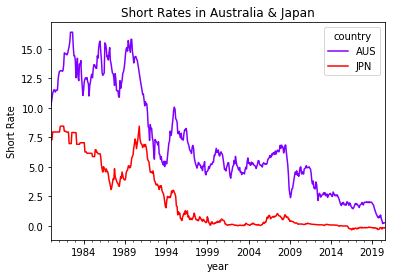

In [12]:
ShortRates = dl.pull('ShortRates')
ShortRates[['AUS','JPN']].plot(cmap="rainbow")
plt.title('Short Rates in Australia & Japan')
plt.xlabel("year")
plt.ylabel("Short Rate")
plt.show()

In the early-1990s, Australian bonds outperorms the other listed countries. This is likely caused by a drop in short rates in the early 1990s, as shown above, which caused bonds people were holding to rise in price, increasing returns. However, Japanese bonds underperformed during the 2000s. As shown above, Japanese short rates dropped to basically 0%, making bonds unappealing to investors because of such low yields, and driving lower returns. 

**3) In your data library, you have data series capturing total bond returns in local currency (i.e., what are my returns to holding a Japanese sovereign bond in Yen). You also have currency exchange rates. Let's pretened you could hedge your currency exposure perfectly and only pay 20bps (0.2%) to do so. How different would your hedged and unhedged returns be in each country? Why are British hedged and unhedged returns so different around the end of 1992?**

In [151]:
fxVsUSD = dl.pull('fxVsUSD')

Monthly_Returns = BondReturnIndex.pct_change(int(261 / 12))
Hedged_Returns = Monthly_Returns - .002

Curr_Returns = fxAppr*(1+Hedged_Returns)
Unhedged_Returns = Hedged_Returns + Curr_Returns
Diff = Hedged_Returns - Unhedged_Returns

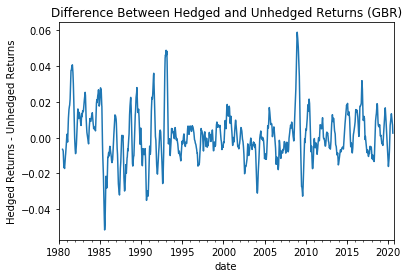

In [160]:
Diff['GBR'].rolling(100).mean().plot()
plt.ylabel("Hedged Returns - Unhedged Returns")
plt.title("Difference Between Hedged and Unhedged Returns (GBR)")
plt.show()

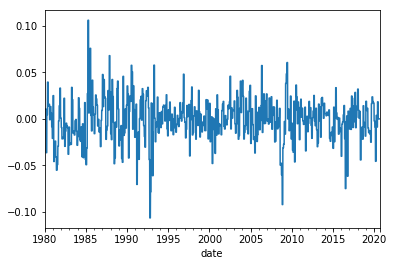

In [18]:
fxAppr['GBR'].plot()
plt.show()

The British pound depreciated greatly in value at the end of 1992 after Black Wednesday, causing those with unhedged bonds to have much lower returns than those that had hedged their bonds against currency risk.

**4) How additive are passively holding (hedged) global bonds to a US 60/40 (equities/bonds) portfolio - is the opportunity as promising as the white paper purports? First, tell me average annual return and volatility of the 60/40 portfolio and then give me a sharpe ratio (risk adjusted return ratio). Next, overlay a global bonds portfolio on top (you're going to need to pick weights to build this portfolio, pick a common sense but justifiable approach to choose weights).**

In [19]:
EquityPrices = dl.pull('EquityPrices')
ReturnIndex = .6*EquityPrices['USA'] + .4*BondReturnIndex['USA']
Annual_Returns = ReturnIndex.pct_change(261)

In [20]:
print(Annual_Returns.mean())
print(Annual_Returns.std())

risk_adjusted = Annual_Returns.resample('M').mean() - ShortRates["USA"]/100

sharpe_ratio = risk_adjusted.mean()/Annual_Returns.std()
print(sharpe_ratio)

0.0930454998863577
0.13726364421349857
0.32793119061899756


**5) Australia doesn't have M2 data, but it does have M1 and M3 data. If we want a standardized set of data reporting on the money supply changes in each country, what might you do? Build it and show your evidence for this being a valid approach.**

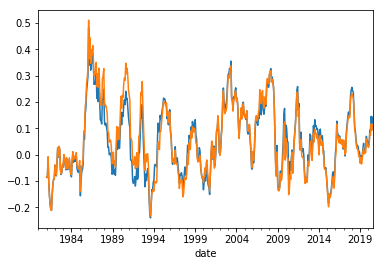

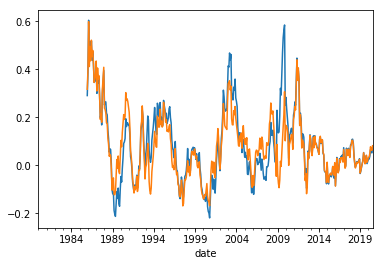

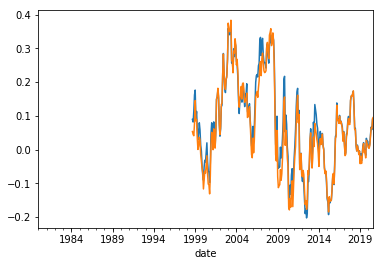

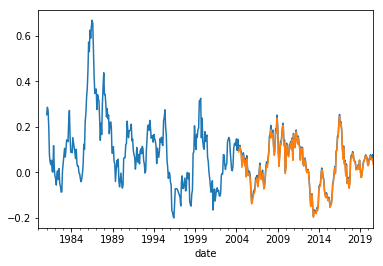

In [161]:
M1 = dl.pull('M1/inUSD')
M2 = dl.pull('M2/inUSD')
M3 = dl.pull('M3/inUSD')

M2['FRA'].pct_change(12).plot()
M3['FRA'].pct_change(12).plot()
plt.show()

M2['CHE'].pct_change(12).plot()
M3['CHE'].pct_change(12).plot()
plt.show()

M2['ESP'].pct_change(12).plot()
M3['ESP'].pct_change(12).plot()
plt.show()

M2['JPN'].pct_change(12).plot()
M3['JPN'].pct_change(12).plot()
plt.show()

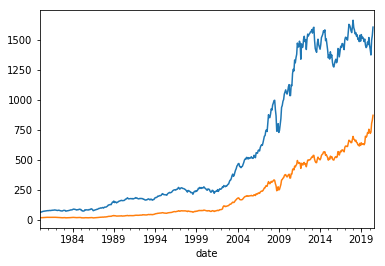

In [163]:
M3['JPN'].plot()
M
M1['JPN'].plot()

**6) The prospectus says you tend to see either big interest rate increases or steep FX declines when the current account is persistently negative. Does the data bear that out in all countries? What's an example when it did work that way and another when it did not?**

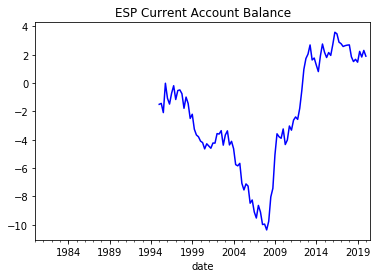

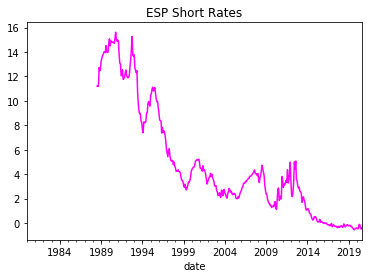

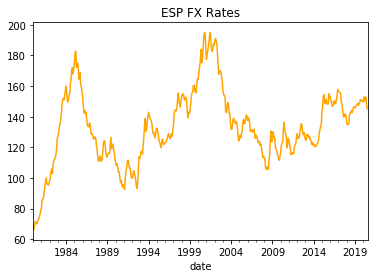

In [22]:
CurrAcct = dl.pull('CurrAcctPctGDP')
country = 'ESP'

CurrAcct[country].plot(c='blue')
plt.title(country + " Current Account Balance")
plt.show()

ShortRates[country].plot(c='magenta')
plt.title(country + " Short Rates")
plt.show()

fxVsUSD[country].plot(c='orange')
plt.title(country + " FX Rates")
plt.show()



In Australia, this claim did hold: Australia had a persistently negative current account from 1980-2018, and there was a steep decline in FX beginning around 2002.

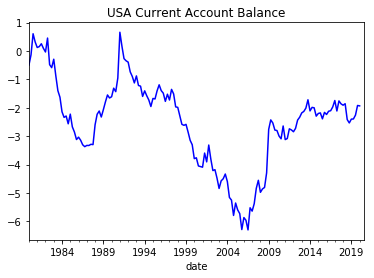

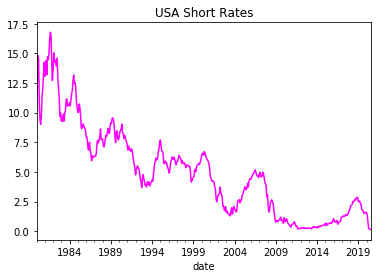

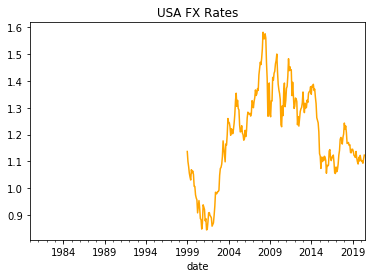

In [204]:
country = 'USA'

CurrAcct[country].plot(c='blue')
plt.title(country + " Current Account Balance")
plt.show()

ShortRates[country].plot(c='magenta')
plt.title(country + " Short Rates")
plt.show()

fxVsUSD[country].plot(c='orange')
plt.title(country + " FX Rates")
plt.show()

However, this doesn't play out as accurately in the USA, which continually runs a current account deficit, but has not seen a big interest rate increase or much of a a notable sharp decline in FX.

**7) A good framework for understanding the total returns of developed world sovereign bonds is that they're driven by real yield changes (opportunity cost changes), inflation changes, and risk premium changes. Let's ignore risk premium and say that economic growth is a good measure of opportunity cost (more places to productively put your money to use when the economy is booming). Let's also proxy growth and inflation expectation with what's occured in the prior 5 years. Show that bond returns have been largely driven by these two components.**

(-4, 4)

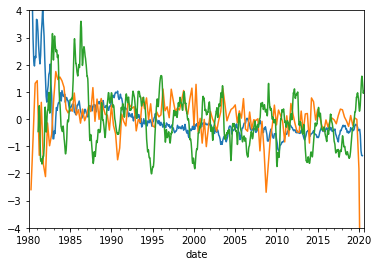

In [196]:
RGDP = dl.pull('GDP/Real')
RGDPChangeQoQ_Unannualized = RGDP.pct_change(1, fill_method = None).dropna(how='all')
RGDPChangeQoQ = (RGDPChangeQoQ_Unannualized + 1) ** 4 - 1

CPI = dl.pull("CoreCPI/SA")
Inf_Unannualized = CPI.pct_change(1, fill_method = None).dropna(how='all')
Inf = (Inf_Unannualized + 1) ** 12 - 1

normalize(Inf)['USA'].rolling(5).mean().plot()
normalize(RGDPChangeQoQ)['USA'].plot()
Bond_Returns['USA'].rolling(30).mean().plot()
plt.ylim(-4,4)

**8) What's a question you have about some claim made in this prospectus (that's provable by digging into the data)? Work through it in the charts.**

In [164]:
def standardize(df):
    scaler = MinMaxScaler()
    scaler.fit(df.T)
    temp = pd.DataFrame(scaler.transform(df.T), index = df.columns,
                       columns = df.index)
    return(temp.T)

def normalize(df):
    new_df = df
    for col in df.columns:
        new_df[col] = (df[col] - df[col].mean())/df[col].std()
    return(new_df)

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


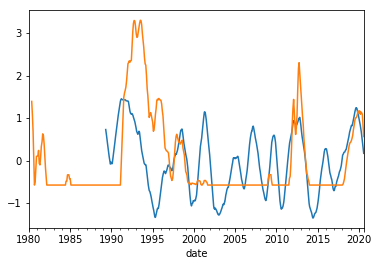

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


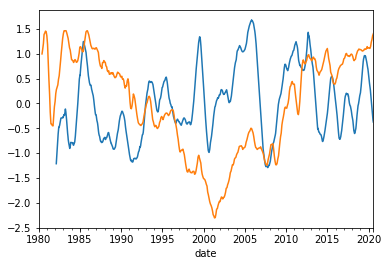

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


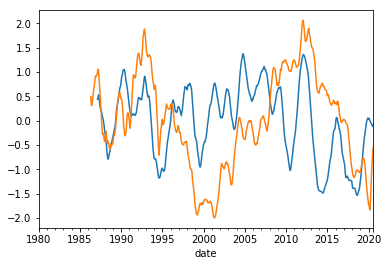

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


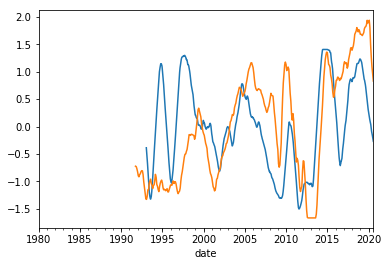

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


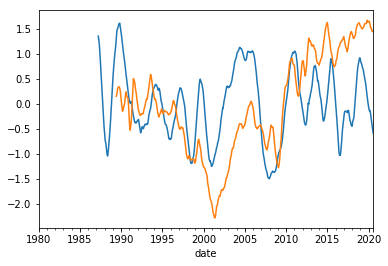

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


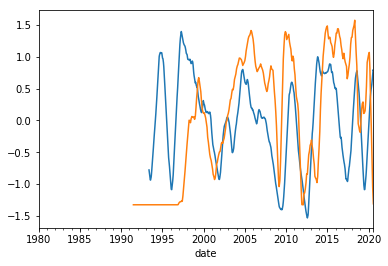

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


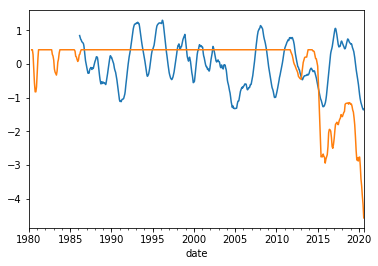

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


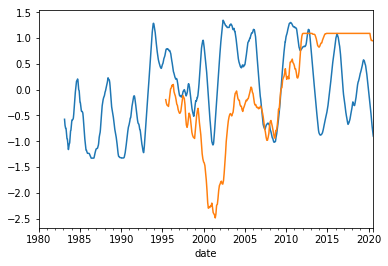

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


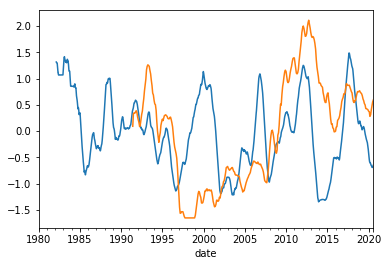

/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/meganhoward1/.local/share/virtualenvs/Internship2020-nLH2vFU1/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


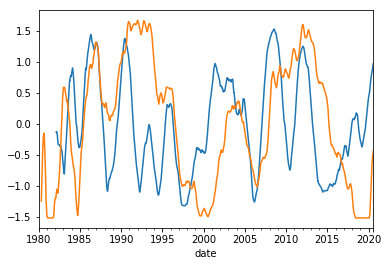

In [146]:
for country in country_codes:
    normalize(standardize(Bond_Returns))[country].rolling(300).mean().plot()
    rel_curve_height = normalize(1-standardize(curve_height))
    (rel_curve_height).rolling(5).mean()[country].plot()
    plt.show()

In [136]:
temp_df = Bond_Returns
for col in Bond_Returns.columns:
    temp_df[col] = (Bond_Returns[col] - Bond_Returns[col].mean())/Bond_Returns[col].std()

In [218]:
Bond_Returns.loc['1990-01-01']

country
AUS    0.414893
DEU   -0.880897
CAN    0.865395
ESP         NaN
FRA   -0.483646
ITA         NaN
JPN   -0.962228
CHE   -2.197747
GBR   -0.159799
USA    0.916803
Name: 1990-01-01, dtype: float64